In [22]:
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

In [24]:
# split data into X and y
X = df.drop(labels=['Label'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
l = []
for feature in zip(model.feature_importances_,X_train.columns):
    l.append(feature)
    print(feature)

(0.21340778, 'DER_mass_MMC')
(0.12371369, 'DER_mass_transverse_met_lep')
(0.06482672, 'DER_mass_vis')
(0.015575023, 'DER_pt_h')
(0.06756122, 'DER_deltaeta_jet_jet')
(0.030146128, 'DER_mass_jet_jet')
(0.017702933, 'DER_prodeta_jet_jet')
(0.03856972, 'DER_deltar_tau_lep')
(0.020412583, 'DER_pt_tot')
(0.022534354, 'DER_sum_pt')
(0.017584756, 'DER_pt_ratio_lep_tau')
(0.032185897, 'DER_met_phi_centrality')
(0.041174274, 'DER_lep_eta_centrality')
(0.049753923, 'PRI_tau_pt')
(0.013668887, 'PRI_tau_eta')
(0.009765195, 'PRI_tau_phi')
(0.012777128, 'PRI_lep_pt')
(0.017706646, 'PRI_lep_eta')
(0.009219348, 'PRI_lep_phi')
(0.017495265, 'PRI_met')
(0.0104004545, 'PRI_met_phi')
(0.012384215, 'PRI_met_sumet')
(0.036181364, 'PRI_jet_num')
(0.018391179, 'PRI_jet_leading_pt')
(0.028981054, 'PRI_jet_leading_eta')
(0.010311915, 'PRI_jet_leading_phi')
(0.014030348, 'PRI_jet_subleading_pt')
(0.010553904, 'PRI_jet_subleading_eta')
(0.009193197, 'PRI_jet_subleading_phi')
(0.013791036, 'PRI_jet_all_pt')


In [26]:
l.sort(reverse=True)
l

[(0.21340778, 'DER_mass_MMC'),
 (0.12371369, 'DER_mass_transverse_met_lep'),
 (0.06756122, 'DER_deltaeta_jet_jet'),
 (0.06482672, 'DER_mass_vis'),
 (0.049753923, 'PRI_tau_pt'),
 (0.041174274, 'DER_lep_eta_centrality'),
 (0.03856972, 'DER_deltar_tau_lep'),
 (0.036181364, 'PRI_jet_num'),
 (0.032185897, 'DER_met_phi_centrality'),
 (0.030146128, 'DER_mass_jet_jet'),
 (0.028981054, 'PRI_jet_leading_eta'),
 (0.022534354, 'DER_sum_pt'),
 (0.020412583, 'DER_pt_tot'),
 (0.018391179, 'PRI_jet_leading_pt'),
 (0.017706646, 'PRI_lep_eta'),
 (0.017702933, 'DER_prodeta_jet_jet'),
 (0.017584756, 'DER_pt_ratio_lep_tau'),
 (0.017495265, 'PRI_met'),
 (0.015575023, 'DER_pt_h'),
 (0.014030348, 'PRI_jet_subleading_pt'),
 (0.013791036, 'PRI_jet_all_pt'),
 (0.013668887, 'PRI_tau_eta'),
 (0.012777128, 'PRI_lep_pt'),
 (0.012384215, 'PRI_met_sumet'),
 (0.010553904, 'PRI_jet_subleading_eta'),
 (0.0104004545, 'PRI_met_phi'),
 (0.010311915, 'PRI_jet_leading_phi'),
 (0.009765195, 'PRI_tau_phi'),
 (0.009219348, 'PRI_

In [27]:
l_i = []
l_v = []
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 0):
            l_i.append(l[importance][var])
        else:
            l_v.append(l[importance][var])

In [28]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(l_i[0:10])
x = np.array(l_v[0:10])

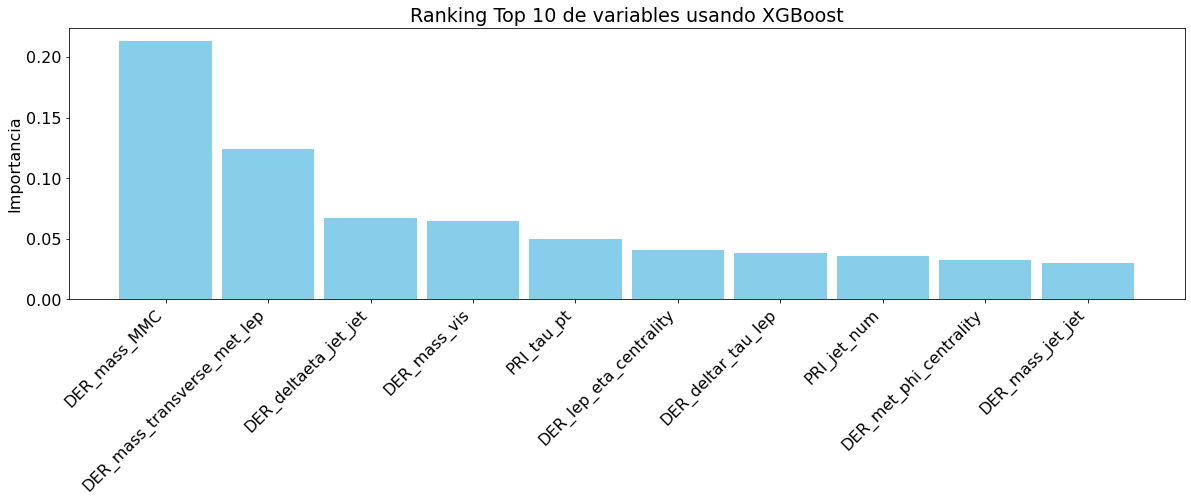

In [29]:
font = {'size'   : 16}
pyplot.rc('font', **font)
fig = plt.figure(figsize = (20, 5))


# creating the bar plot
plt.ylabel("Importancia")
plt.bar(x, y, color ='skyblue',
        width = 0.9)
plt.xticks(rotation=45, ha='right')
plt.title("Ranking Top 10 de variables usando XGBoost")
plt.show()

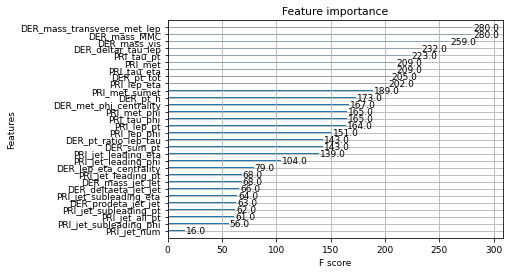

In [9]:
from xgboost import plot_importance
# plot feature importance
font = {'size'   : 9}
pyplot.rc('font', **font)
plot_importance(model)
pyplot.show()